### 1.Read the file:

In [3]:
# ! pip install mysql


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import sys
import mysql.connector
# Read the file into a pandas dataframe
df = pd.read_csv("used_bikes.csv")


### 2.Change the data types of the columns:

In [8]:
print("Memory usage before changing data types:")
print(df.info(memory_usage='deep'))
print("=========================================")
# Change the datatypes of the columns
df['price'] = df['price'].astype('float32')
df['kms_driven'] = df['kms_driven'].astype('float32')
df['age'] = df['age'].astype('float32')
df['power'] = df['power'].astype('float32')

# Check the memory usage after changing data types
print("\nMemory usage after changing data types:")
print(df.info(memory_usage='deep'))

Memory usage before changing data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   bike_name   149 non-null    object
 1   price       149 non-null    int32 
 2   city        149 non-null    object
 3   kms_driven  149 non-null    int32 
 4   owner       149 non-null    object
 5   age         149 non-null    int8  
 6   power       149 non-null    int16 
 7   brand       149 non-null    object
dtypes: int16(1), int32(2), int8(1), object(4)
memory usage: 41.9 KB
None

Memory usage after changing data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   149 non-null    object 
 1   price       149 non-null    float32
 2   city        149 non-null    object 
 3   kms_driven  149 non-null  

#### Memory usage changed from 41.9 KB to 42.6 KB as  i changed the datatype of column from int32 to float32

### 3. Dump the data into the MySQL database:

In [13]:
# Connect to the MySQL database
cnx = mysql.connector.connect(user='root', password='root', host='localhost',database='task2_db')
cursor = cnx.cursor()
# Create a database
cursor.execute("CREATE DATABASE IF NOT EXISTS task2_db")
# Use the database
cursor.execute("USE task2_db")

# Create a table
table_create = "CREATE TABLE IF NOT EXISTS bikes (bike_name VARCHAR(255), price INT, city VARCHAR(255), kms_driven INT, owner VARCHAR(255), age TINYINT, power SMALLINT, brand VARCHAR(255))"
cursor.execute(table_create)

# Delete the indexing from the table
# cursor.execute("ALTER TABLE bikes DROP INDEX index_bike_name")


# Insert the data into the table
for index, row in df.iterrows():
    insert_query = f"INSERT INTO bikes (bike_name, price, city, kms_driven, owner, age, power, brand) VALUES ('{row['bike_name']}', {row['price']}, '{row['city']}', {row['kms_driven']}, '{row['owner']}', {row['age']}, {row['power']}, '{row['brand']}')"
    cursor.execute(insert_query)

# Commit the changes
cnx.commit()

# Close the cursor and connection
cursor.close()
cnx.close()

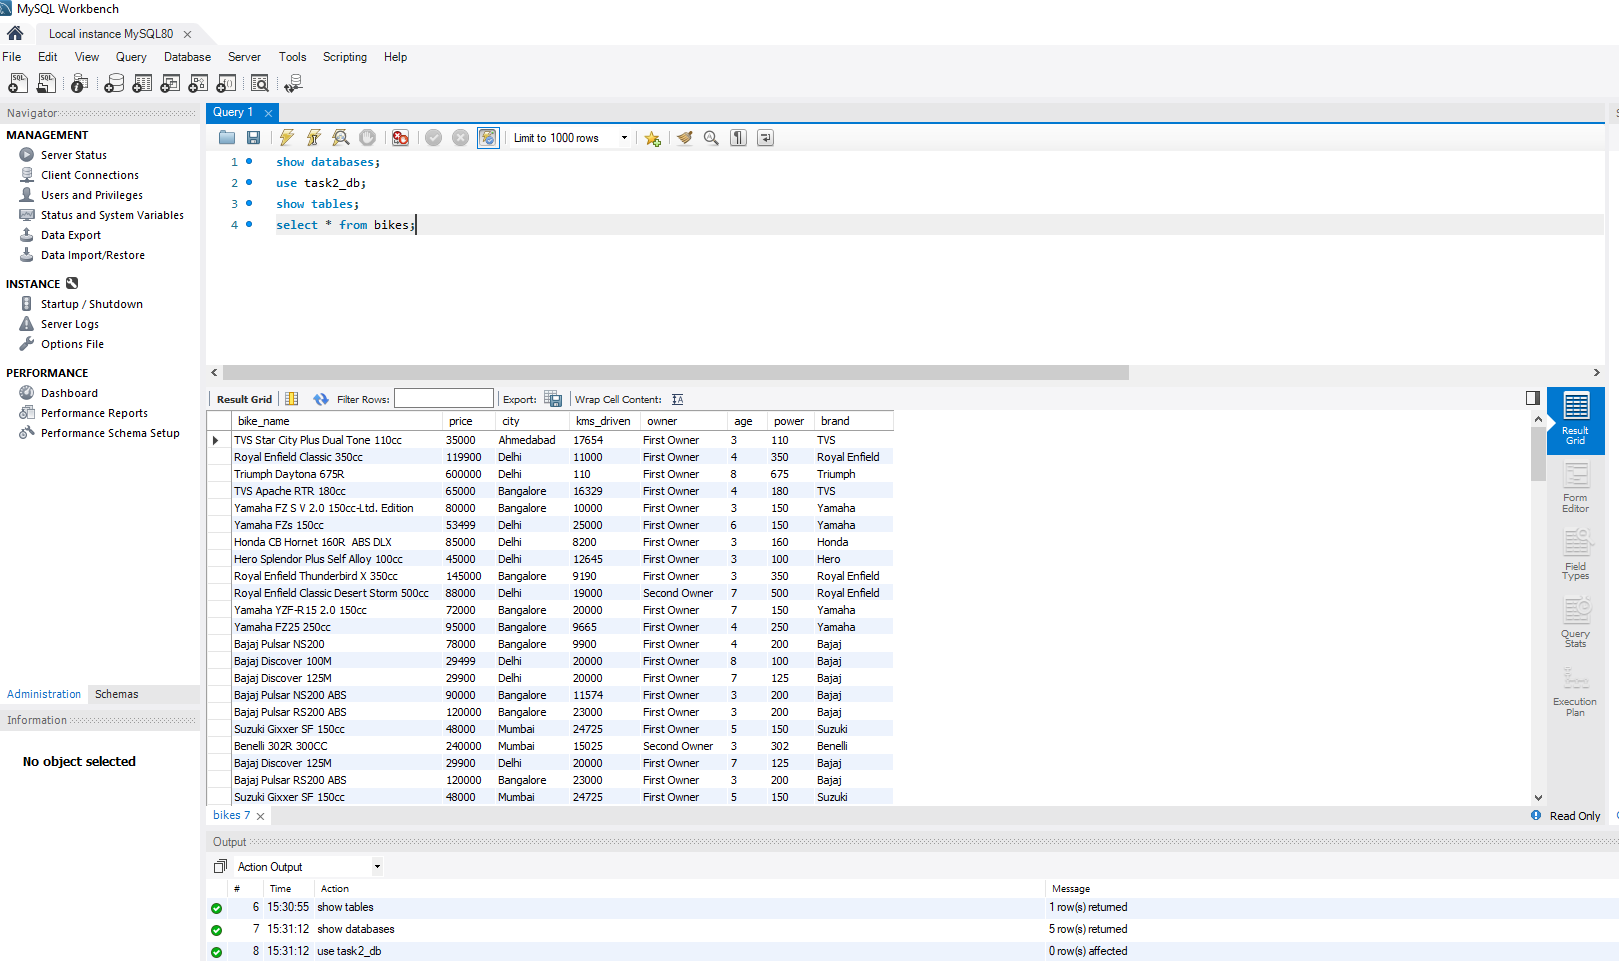

### 4. Index the column after the data is inserted:

In [14]:
# Connect to the MySQL database
cnx = mysql.connector.connect(user='root', password='root', host='localhost', database='task2_db')
cursor = cnx.cursor()

# Create the index
cursor.execute("CREATE INDEX index_bike_name ON bikes (bike_name)")

# Commit the changes
cnx.commit()

# Close the cursor and connection
cursor.close()
cnx.close()


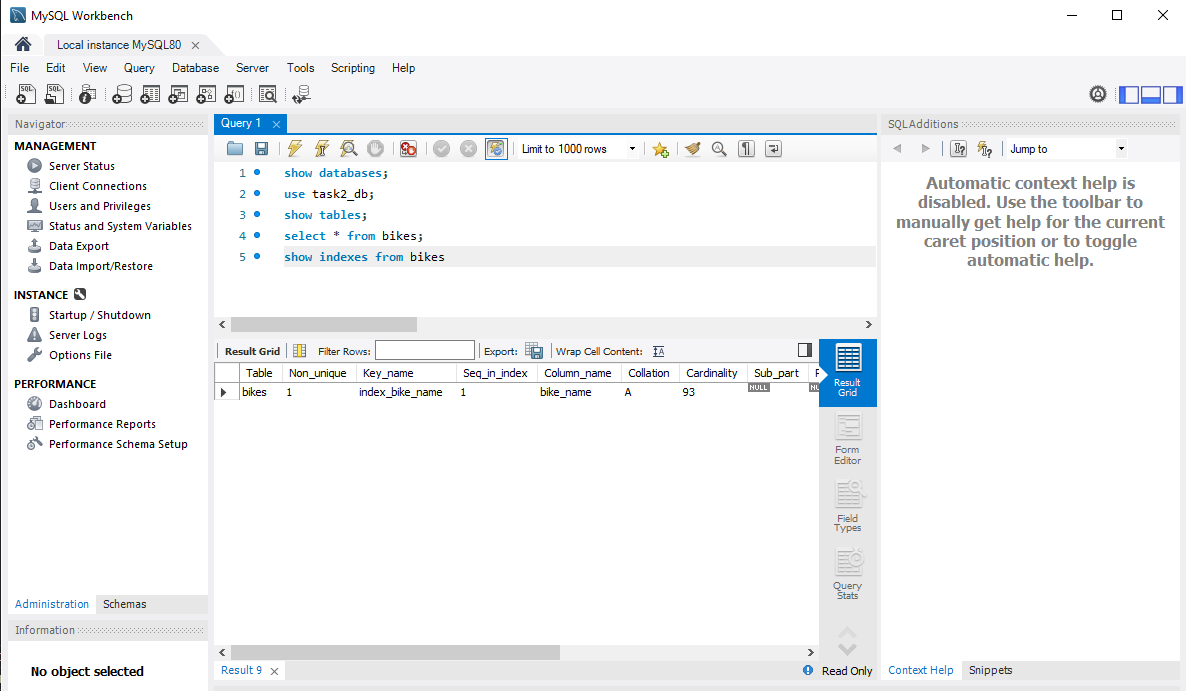